In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

In [178]:
pd_excel_file = pd.ExcelFile('../data/landing/population_historical.xlsx')

In [179]:
# Get sheet 1 as a DataFrame
df = pd.read_excel(pd_excel_file, 'Table 1', skiprows=5, skipfooter=2, header=[0,1])

In [180]:
df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,no.,no.,...,no.,no.,no.,no.,no.,no.,no.,no.,no.,no.
0,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021007,Braidwood,2760,2811,...,3762,3849,3950,4041,4145,4218,4282,4332,4366,4396
1,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021008,Karabar,9129,9199,...,8731,8603,8531,8530,8516,8500,8535,8548,8528,8483
2,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021009,Queanbeyan,9717,9513,...,11199,11213,11230,11362,11460,11468,11460,11375,11391,11420
3,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021010,Queanbeyan - East,3925,4073,...,4967,4961,4970,5016,5079,5126,5089,5097,5091,5099
4,1RNSW,Rest of NSW,101,Capital Region,10102,Queanbeyan,101021012,Queanbeyan West - Jerrabomberra,9425,10257,...,13193,13164,13150,13090,13022,12955,12821,12748,12781,12873


In [181]:
VICTORIA_GCCSA_CODES = ['2GMEL', '2RVIC']
df = df[df.iloc[:,0].isin(VICTORIA_GCCSA_CODES)]
df.head()

,Unnamed: 0_level_0,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,2001,2002,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,GCCSA code,GCCSA name,SA4 code,SA4 name,SA3 code,SA3 name,SA2 code,SA2 name,no.,no.,...,no.,no.,no.,no.,no.,no.,no.,no.,no.,no.
642,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011001,Alfredton,5756,6092,...,10338,11039,11852,12649,13537,14434,15507,16841,18002,18997
643,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011002,Ballarat,11497,11708,...,12327,12300,12301,12266,12244,12320,12196,12071,11938,11809
644,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011005,Buninyong,5320,5399,...,7082,7191,7311,7409,7418,7458,7377,7229,7247,7323
645,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011006,Delacombe,4154,4225,...,6583,6846,7195,7622,8183,8890,9755,10648,11798,12869
646,2RVIC,Rest of Vic.,201,Ballarat,20101,Ballarat,201011007,Smythes Creek,3317,3378,...,3945,3966,3990,4004,4042,4112,4152,4211,4223,4268


In [182]:
# Remove first 6 columns
df = df.iloc[:,6:]
df.head()

,Unnamed: 6_level_0,Unnamed: 7_level_0,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
,SA2 code,SA2 name,no.,no.,no.,no.,no.,no.,no.,no.,...,no.,no.,no.,no.,no.,no.,no.,no.,no.,no.
642,201011001,Alfredton,5756,6092,6293,6480,6648,6761,7034,7272,...,10338,11039,11852,12649,13537,14434,15507,16841,18002,18997
643,201011002,Ballarat,11497,11708,12015,12189,12269,12356,12408,12480,...,12327,12300,12301,12266,12244,12320,12196,12071,11938,11809
644,201011005,Buninyong,5320,5399,5557,5620,5857,6037,6131,6252,...,7082,7191,7311,7409,7418,7458,7377,7229,7247,7323
645,201011006,Delacombe,4154,4225,4371,4465,4704,5041,5206,5349,...,6583,6846,7195,7622,8183,8890,9755,10648,11798,12869
646,201011007,Smythes Creek,3317,3378,3411,3473,3508,3542,3594,3658,...,3945,3966,3990,4004,4042,4112,4152,4211,4223,4268


In [183]:
# Flatten the multi-level column names
df.columns = ["SA2_CODE", "SA2_NAME"] + [f"{year}" for year in range(2001, 2024)]
df.head()

,SA2_CODE,SA2_NAME,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
642,201011001,Alfredton,5756,6092,6293,6480,6648,6761,7034,7272,...,10338,11039,11852,12649,13537,14434,15507,16841,18002,18997
643,201011002,Ballarat,11497,11708,12015,12189,12269,12356,12408,12480,...,12327,12300,12301,12266,12244,12320,12196,12071,11938,11809
644,201011005,Buninyong,5320,5399,5557,5620,5857,6037,6131,6252,...,7082,7191,7311,7409,7418,7458,7377,7229,7247,7323
645,201011006,Delacombe,4154,4225,4371,4465,4704,5041,5206,5349,...,6583,6846,7195,7622,8183,8890,9755,10648,11798,12869
646,201011007,Smythes Creek,3317,3378,3411,3473,3508,3542,3594,3658,...,3945,3966,3990,4004,4042,4112,4152,4211,4223,4268


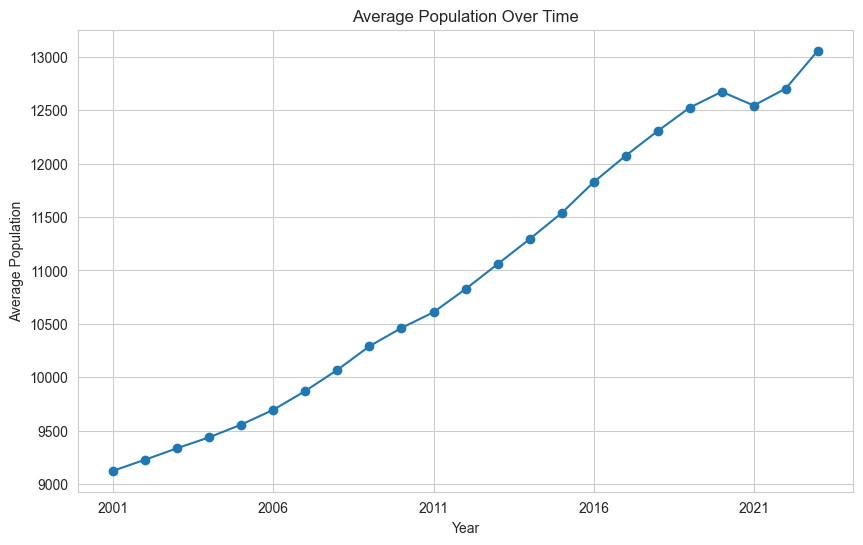

In [184]:
pop_data = df.loc[:, '2001':'2023']

avg_population = pop_data.mean(axis=0)

# Plot the average population over the years
plt.figure(figsize=(10, 6))
avg_population.plot(kind='line', marker='o')
plt.title('Average Population Over Time')
plt.xlabel('Year')
plt.ylabel('Average Population')
plt.grid(True)
plt.show()

In [185]:
pop_data = df.loc[:, '2001':'2023'].T
pop_data.columns = df['SA2_CODE']
pop_data.index = pd.to_datetime(pop_data.index + '-01-01')  # Convert years to datetime format
pop_data.head()

SA2_CODE,201011001,201011002,201011005,201011006,201011007,201011008,201011481,201011482,201011483,201011484,...,217031471,217031472,217031473,217031474,217031475,217031476,217041477,217041478,217041479,217041480
2001-01-01,5756,11497,5320,4154,3317,13355,8018,12250,9129,11295,...,3661,11432,5829,5742,7914,3452,6718,8317,17053,12506
2002-01-01,6092,11708,5399,4225,3378,13255,8066,12520,9141,11248,...,3658,11446,5770,5714,7880,3479,6704,8387,17449,12578
2003-01-01,6293,12015,5557,4371,3411,13161,8080,12758,9179,11228,...,3622,11524,5746,5640,7780,3511,6676,8450,17726,12639
2004-01-01,6480,12189,5620,4465,3473,13095,8061,12939,9177,11137,...,3599,11508,5733,5626,7754,3511,6643,8487,17937,12697
2005-01-01,6648,12269,5857,4704,3508,13028,8057,13077,9296,11127,...,3583,11543,5708,5596,7700,3492,6638,8517,18172,12748


In [186]:
# Reindex to add quarterly periods from 2000 to 2028 for each suburb
quarterly_dates = pd.date_range(start='2000-01-01', end='2028-12-31', freq='QS-JAN')
pop_data = pop_data.reindex(quarterly_dates)
pop_data

SA2_CODE,201011001,201011002,201011005,201011006,201011007,201011008,201011481,201011482,201011483,201011484,...,217031471,217031472,217031473,217031474,217031475,217031476,217041477,217041478,217041479,217041480
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,5756.0,11497.0,5320.0,4154.0,3317.0,13355.0,8018.0,12250.0,9129.0,11295.0,...,3661.0,11432.0,5829.0,5742.0,7914.0,3452.0,6718.0,8317.0,17053.0,12506.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
# Interpolate each suburb individually to fill in missing quarterly data and extrapolate
# Interpolate each suburb individually, then apply linear extrapolation
for suburb in pop_data.columns:
    # Get the original data without NaNs for interpolation
    known_years = pop_data[pop_data[suburb].notna()].index
    known_values = pop_data[pop_data[suburb].notna()][suburb]

    # Create an interpolation function with linear extrapolation enabled
    interp_func = interpolate.interp1d(
        x=known_years.astype(np.int64),  # Convert dates to integers
        y=known_values,
        kind='linear',
        fill_value='extrapolate'
    )
    
    # Apply the interpolation and extrapolation function across the full date range
    pop_data[suburb] = interp_func(quarterly_dates.astype(np.int64))

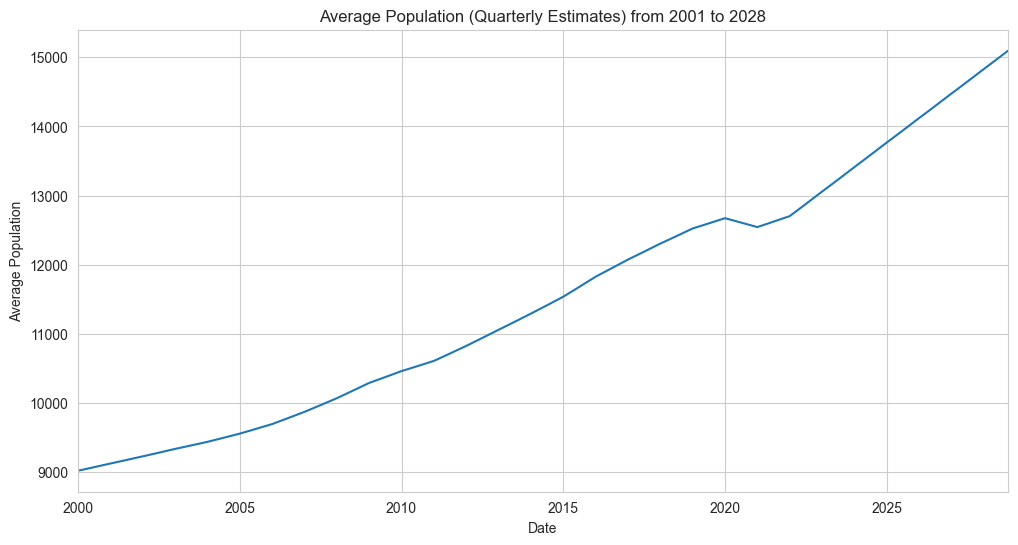

In [188]:
avg_population = pop_data.mean(axis=1)

# Plot the interpolated and extrapolated quarterly estimates
plt.figure(figsize=(12, 6))
avg_population.plot(kind='line')
plt.title('Average Population (Quarterly Estimates) from 2001 to 2028')
plt.xlabel('Date')
plt.ylabel('Average Population')
plt.grid(True)
plt.show()

In [189]:
# Flatten the DataFrame to have a single row for each suburb and quarter
pop_data = pop_data.stack().reset_index()
pop_data.columns = ['Date', 'SA2_CODE', 'Population']
pop_data.head()

,Date,SA2_CODE,Population
0,2000-01-01,201011001,5419.079452
1,2000-01-01,201011002,11285.421918
2,2000-01-01,201011005,5240.783562
3,2000-01-01,201011006,4082.805479
4,2000-01-01,201011007,3255.832877


In [190]:
# Save the interpolated and extrapolated population data to a CSV file
pop_data.to_csv('../data/raw/population_historical.csv')